In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading data

In [2]:
metadata_df = pd.read_excel("./metadata.xlsx")
metadata_df.head()

,sample-id,score,group
0,ERR1072630,0.7916,OTHER
1,ERR1072633,0.7986,OTHER
2,ERR1072638,0.7697,OTHER
3,ERR1072639,0.7466,OTHER
4,ERR1072646,0.6705,NORMAL


In [3]:
taxonomy_df = pd.read_excel("./taxonomy_400.xlsx")

In [4]:
taxonomy_df.head()

,taxonomy,ERR2032802,ERR1845748,ERR2092355,ERR1845937,ERR1249738,ERR1090583,ERR1250049,ERR1459183,ERR1075840,...,ERR2057080,ERR1678465,ERR1074540,ERR1077998,ERR2033465,ERR1389801,ERR1845840,ERR1842195,ERR1075183,ERR1077294
0,Faecalibacterium prausnitzii,0.044,0.123,0.020,0.031,0.116,0.058,0.025,0.098,0.068,...,0.018,0.103,0.027,0.009,0.026,0.007,0.036,0.029,0.002,0.047
1,Phocaeicola vulgatus,0.234,0.110,0.194,0.109,0.044,0.057,0.017,0.168,0.052,...,0.005,0.003,0.001,0.000,0.085,0.053,0.005,0.001,0.001,0.000
2,Prevotella copri,0.001,0.000,0.001,0.324,0.480,0.718,0.639,0.000,0.000,...,0.000,0.009,0.076,0.001,0.000,0.000,0.007,0.000,0.002,0.005
3,Bacteroides uniformis,0.041,0.055,0.040,0.000,0.002,0.000,0.007,0.048,0.072,...,0.005,0.003,0.000,0.023,0.020,0.002,0.010,0.000,0.000,0.001
4,[Eubacterium] rectale,0.042,0.227,0.011,0.000,0.003,0.000,0.002,0.066,0.029,...,0.000,0.002,0.001,0.000,0.006,0.001,0.006,0.000,0.000,0.000


In [5]:
taxonomy_np = taxonomy_df.to_numpy()
sample_ids = list(taxonomy_df.columns)[1:]
sample_abundances = np.array(taxonomy_np[:, 1:].T, dtype=float)
sample_abundances

sample_abundances_df = pd.DataFrame(sample_abundances, columns=taxonomy_np[:, 0])
sample_abundances_df["sample-id"] = sample_ids
sample_abundances_columns = list(sample_abundances_df.columns)
sample_abundances_columns = [sample_abundances_columns[-1]] + sample_abundances_columns[:-1]
sample_abundances_df = sample_abundances_df.reindex(columns=sample_abundances_columns)
sample_abundances_df

,sample-id,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,Akkermansia muciniphila,Bacteroides stercoris,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,ERR2032802,0.044,0.234,0.001,0.041,0.042,0.010,0.070,0.000,0.086,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1845748,0.123,0.110,0.000,0.055,0.227,0.023,0.074,0.002,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR2092355,0.020,0.194,0.001,0.040,0.011,0.000,0.013,0.491,0.000,...,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1845937,0.031,0.109,0.324,0.000,0.000,0.000,0.015,0.079,0.020,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERR1249738,0.116,0.044,0.480,0.002,0.003,0.000,0.007,0.000,0.017,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,ERR1389801,0.007,0.053,0.000,0.002,0.001,0.000,0.001,0.000,0.001,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2823,ERR1845840,0.036,0.005,0.007,0.010,0.006,0.000,0.011,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2824,ERR1842195,0.029,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2825,ERR1075183,0.002,0.001,0.002,0.000,0.000,0.000,0.001,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Get each group id

In [6]:
metadata_normal_df = metadata_df[metadata_df["group"] == "NORMAL"]
metadata_deviant_df = metadata_df[metadata_df["group"] == "DEVIANT"]

In [7]:
metadata_normal_df

,sample-id,score,group
4,ERR1072646,0.6705,NORMAL
9,ERR1072667,0.6846,NORMAL
12,ERR1072677,0.6784,NORMAL
15,ERR1072714,0.6971,NORMAL
16,ERR1072719,0.6441,NORMAL
...,...,...,...
2820,ERR2092547,0.6996,NORMAL
2821,ERR2092585,0.6895,NORMAL
2822,ERR2092593,0.6618,NORMAL
2824,ERR2092680,0.6411,NORMAL


In [8]:
metadata_deviant_df

,sample-id,score,group
13,ERR1072712,0.9280,DEVIANT
14,ERR1072713,0.9463,DEVIANT
42,ERR1072867,0.9386,DEVIANT
108,ERR1073228,0.8924,DEVIANT
160,ERR1073693,0.9317,DEVIANT
...,...,...,...
2720,ERR2092071,0.8913,DEVIANT
2769,ERR2092311,0.9448,DEVIANT
2800,ERR2092419,0.9152,DEVIANT
2806,ERR2092435,0.9141,DEVIANT


## Merge into new dataframe

In [9]:
deviant_group_df = metadata_deviant_df.merge(sample_abundances_df, how="left", on="sample-id")
deviant_group_df

,sample-id,score,group,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,ERR1072712,0.9280,DEVIANT,0.050,0.003,0.000,0.000,0.004,0.000,0.001,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
1,ERR1072713,0.9463,DEVIANT,0.000,0.016,0.000,0.001,0.000,0.000,0.223,...,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,ERR1072867,0.9386,DEVIANT,0.000,0.025,0.000,0.000,0.003,0.000,0.003,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,ERR1073228,0.8924,DEVIANT,0.011,0.000,0.000,0.103,0.002,0.000,0.015,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,ERR1073693,0.9317,DEVIANT,0.000,0.000,0.000,0.112,0.000,0.199,0.132,...,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,ERR2092071,0.8913,DEVIANT,0.018,0.288,0.001,0.088,0.000,0.000,0.083,...,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
138,ERR2092311,0.9448,DEVIANT,0.011,0.019,0.880,0.001,0.003,0.000,0.002,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
139,ERR2092419,0.9152,DEVIANT,0.033,0.547,0.002,0.008,0.000,0.000,0.073,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
140,ERR2092435,0.9141,DEVIANT,0.000,0.002,0.001,0.000,0.000,0.000,0.000,...,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005


In [10]:
normal_group_df = metadata_normal_df.merge(sample_abundances_df, how="left", on="sample-id")
normal_group_df

,sample-id,score,group,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,ERR1072646,0.6705,NORMAL,0.133,0.126,0.0,0.067,0.030,0.000,0.009,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,ERR1072667,0.6846,NORMAL,0.230,0.066,0.0,0.044,0.043,0.051,0.017,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,ERR1072677,0.6784,NORMAL,0.174,0.177,0.0,0.074,0.020,0.037,0.011,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,ERR1072714,0.6971,NORMAL,0.096,0.303,0.0,0.064,0.027,0.000,0.025,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,ERR1072719,0.6441,NORMAL,0.061,0.077,0.0,0.009,0.007,0.030,0.013,...,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,ERR2092547,0.6996,NORMAL,0.179,0.045,0.0,0.007,0.069,0.000,0.001,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1410,ERR2092585,0.6895,NORMAL,0.121,0.139,0.0,0.073,0.048,0.000,0.133,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1411,ERR2092593,0.6618,NORMAL,0.067,0.070,0.0,0.019,0.053,0.000,0.003,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1412,ERR2092680,0.6411,NORMAL,0.045,0.033,0.0,0.006,0.014,0.006,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001


Faecalibacterium prausnitzii


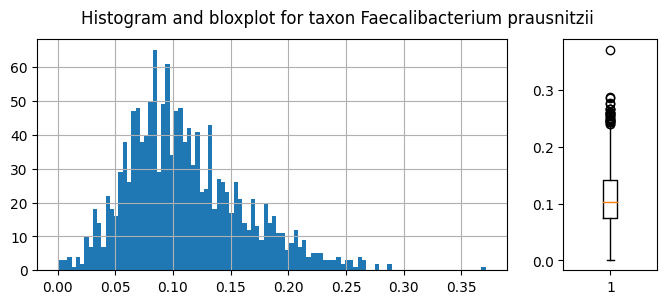

Phocaeicola vulgatus


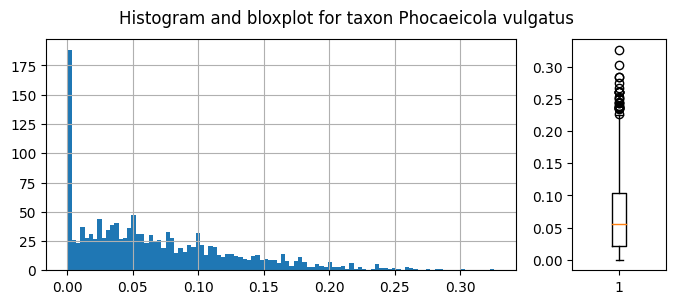

Prevotella copri


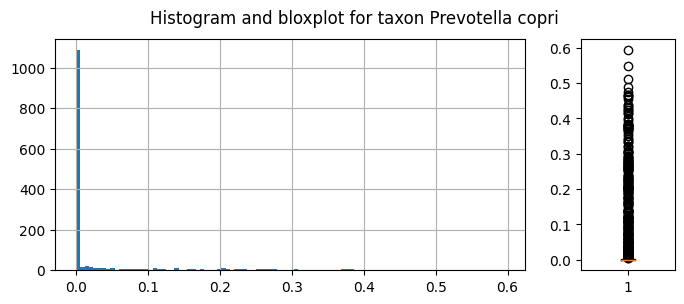

Bacteroides uniformis


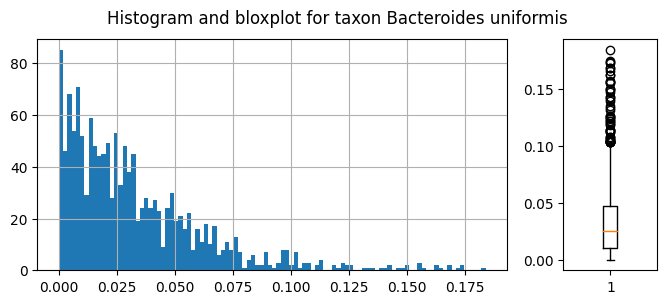

[Eubacterium] rectale


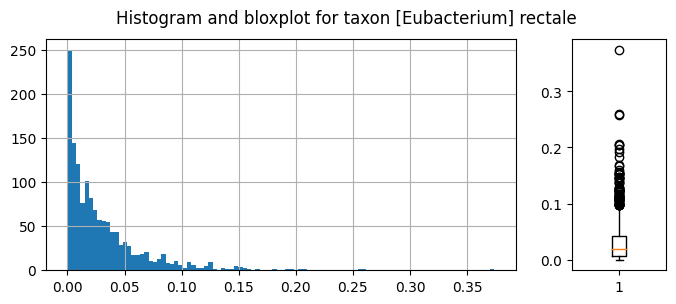

In [11]:
for taxon in taxonomy_np[0:5, 0]:
    print(taxon)
    fig, axs = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [5, 1]})
    fig.suptitle(f"Histogram and bloxplot for taxon {taxon}")
    normal_group_df[taxon].hist(bins=100, ax=axs[0])
    axs[1].boxplot(normal_group_df[taxon])
    outfilename = taxon.replace(" ", "_").replace("[", "").replace("]", "").lower()
    plt.savefig(f"imgs/stat_{outfilename}.png")
    plt.show()

In [12]:
threshold_result = pd.DataFrame(normal_group_df[taxonomy_np[:, 0]].quantile(0.05), columns=["taxonomy", "threshold"])

In [13]:
threshold_result

,taxonomy,threshold


In [14]:
normal_group_df[taxonomy_np[:, 0]].quantile(0.5)

Faecalibacterium prausnitzii                                       0.103
Phocaeicola vulgatus                                               0.055
Prevotella copri                                                   0.000
Bacteroides uniformis                                              0.025
[Eubacterium] rectale                                              0.019
                                                                   ...  
Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava    0.000
Ruthenibacterium lactatiformans/Fournierella massiliensis          0.000
Stenotrophomonas geniculata/maltophilia/pavanii                    0.000
Tepidibaculum saccharolyticum/Ruminococcus albus                   0.000
Sellimonas intestinalis/Drancourtella massiliensis                 0.000
Name: 0.5, Length: 400, dtype: float64

In [15]:
taxon_threshold = np.array(normal_group_df[taxonomy_np[:, 0]].quantile(0.5))

In [16]:
sum(taxon_threshold == 0)

323

In [17]:
deviant_group_binary_df = deviant_group_df.copy()
for i, taxon in enumerate(taxonomy_np[:, 0]):
    deviant_group_binary_df[taxon] = np.array(deviant_group_binary_df[taxon] < taxon_threshold[i], dtype=int)
deviant_group_binary_df

,sample-id,score,group,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,ERR1072712,0.9280,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ERR1072713,0.9463,DEVIANT,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR1072867,0.9386,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ERR1073228,0.8924,DEVIANT,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR1073693,0.9317,DEVIANT,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,ERR2092071,0.8913,DEVIANT,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
138,ERR2092311,0.9448,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
139,ERR2092419,0.9152,DEVIANT,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
140,ERR2092435,0.9141,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
np.sum(deviant_group_binary_df.iloc[:, 3:].to_numpy(), axis=1)

array([67, 68, 70, 55, 67, 51, 62, 64, 64, 59, 56, 76, 54, 62, 63, 65, 54,
       69, 70, 39, 44, 62, 58, 56, 76, 56, 54, 71, 55, 54, 76, 55, 66, 49,
       64, 61, 74, 62, 71, 62, 57, 48, 63, 60, 61, 69, 59, 67, 51, 61, 46,
       55, 76, 63, 76, 76, 76, 76, 76, 76, 67, 61, 75, 76, 77, 76, 76, 76,
       76, 76, 76, 73, 76, 76, 76, 76, 76, 76, 76, 77, 76, 76, 76, 76, 76,
       76, 76, 76, 76, 76, 59, 70, 46, 56, 47, 61, 53, 71, 57, 68, 60, 75,
       66, 60, 46, 47, 69, 61, 68, 70, 65, 60, 58, 59, 63, 57, 56, 56, 56,
       73, 57, 69, 71, 75, 66, 58, 63, 68, 64, 69, 59, 52, 60, 57, 65, 61,
       56, 55, 70, 59, 66, 53])

In [19]:
np.average(np.sum(deviant_group_binary_df.iloc[:, 3:].to_numpy(), axis=1))

64.7394366197183

In [20]:
deviant_group_binary_df.to_csv("patient_inputs.csv", index=False)

In [21]:
deviant_group_df.columns[3:]

Index(['Faecalibacterium prausnitzii', 'Phocaeicola vulgatus',
       'Prevotella copri', 'Bacteroides uniformis', '[Eubacterium] rectale',
       'Phocaeicola dorei',
       'Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens',
       'Akkermansia muciniphila', 'Bacteroides stercoris', 'Blautia wexlerae',
       ...
       'Comamonas jiangduensis/kerstersii/terrae', 'Enterocloster aldenensis',
       'Faecalicatena orotica/Lachnobacterium bovis',
       'Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii',
       'Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii',
       'Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava',
       'Ruthenibacterium lactatiformans/Fournierella massiliensis',
       'Stenotrophomonas geniculata/maltophilia/pavanii',
       'Tepidibaculum saccharolyticum/Ruminococcus albus',
       'Sellimonas intestinalis/Drancourtella massiliensis'],
      dtype='object', length=4